In [1]:
'''
Name: Mohammad M Bhuiyan
ID: 215808420
Email: bhui8420@mylaurier.ca

This project attempts to predict cause of wildfire from data that was collected 
in the USA over the period of 24 years from 1992 to 2005. The data made available 
for study in Kaggle as “1.88 Million US Wildfires” and could be downloaded 
from https://www.kaggle.com/rtatman/188-million-us-wildfires as SQLite database.

The data file should be in './data/FPA_FOD_20170508.sqlite'
'''
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as mplot
from sklearn import tree, preprocessing
import sklearn.ensemble as sken
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# connect to database
conn = sqlite3.connect('./data/FPA_FOD_20170508.sqlite')

In [3]:
# Pull required columns
clmns = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", conn)
print(clmns.head(15))

    FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0        2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1        2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2        2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3        2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4        2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5        2004        Lightning  38.635278 -120.103611    CA       2453186.5   
6        2004        Lightning  38.688333 -120.153333    CA       2453187.5   
7        2005   Debris Burning  40.968056 -122.433889    CA       2453437.5   
8        2005   Debris Burning  41.233611 -122.283333    CA       2453444.5   
9        2004        Lightning  38.548333 -120.149167    CA       2453187.5   
10       2004        Lightning  38.691667 -120.159722    CA       2453188.5   
11       2004        Lightning  38.527500 -120.10611

In [4]:
# convert date format
clmns['DATE'] = pd.to_datetime(clmns['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(clmns.head(15)) #check the data

    FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0        2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1        2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2        2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3        2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4        2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5        2004        Lightning  38.635278 -120.103611    CA       2453186.5   
6        2004        Lightning  38.688333 -120.153333    CA       2453187.5   
7        2005   Debris Burning  40.968056 -122.433889    CA       2453437.5   
8        2005   Debris Burning  41.233611 -122.283333    CA       2453444.5   
9        2004        Lightning  38.548333 -120.149167    CA       2453187.5   
10       2004        Lightning  38.691667 -120.159722    CA       2453188.5   
11       2004        Lightning  38.527500 -120.10611

In [5]:
# Create MONTH and DAY_OF_WEEK column from DATE column
clmns['MONTH'] = pd.DatetimeIndex(clmns['DATE']).month
clmns['DAY_OF_WEEK'] = clmns['DATE'].dt.day_name()
print(clmns.head(15))

    FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0        2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1        2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2        2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3        2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4        2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5        2004        Lightning  38.635278 -120.103611    CA       2453186.5   
6        2004        Lightning  38.688333 -120.153333    CA       2453187.5   
7        2005   Debris Burning  40.968056 -122.433889    CA       2453437.5   
8        2005   Debris Burning  41.233611 -122.283333    CA       2453444.5   
9        2004        Lightning  38.548333 -120.149167    CA       2453187.5   
10       2004        Lightning  38.691667 -120.159722    CA       2453188.5   
11       2004        Lightning  38.527500 -120.10611

In [6]:
# clone clmns
clmns1 = clmns.copy()

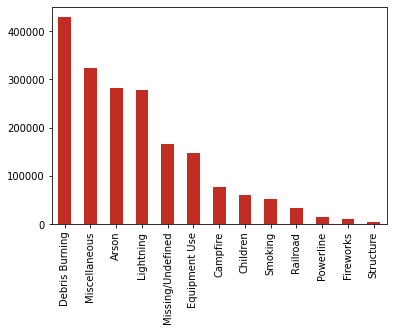

In [7]:
# Exploratory Data Analysis (EDA)
# Explore causes of fire
clmns['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar', color='#c22d23')
mplot.show()

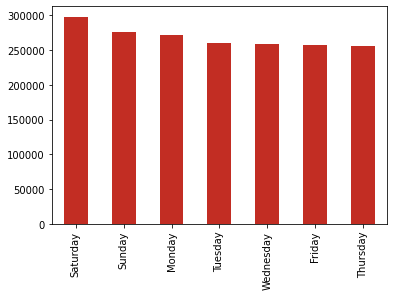

In [8]:
# Explore if there is any relationship between week-days and fire
clmns['DAY_OF_WEEK'].value_counts().plot(kind='bar', color='#c22d23')
mplot.show()

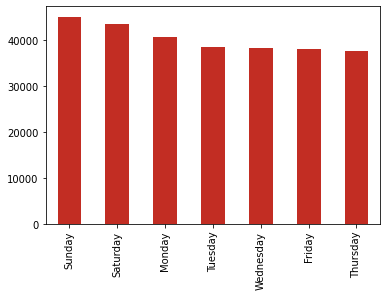

In [9]:
# From above bar we can see that there is upward trend of fire in weekends;
# let we see which cause of fire contributed to this upward trend
# After analyzing different causes of fire, strong correlation was found between arson and weekend

clmns_arson = clmns[clmns['STAT_CAUSE_DESCR']=='Arson']
clmns_arson['DAY_OF_WEEK'].value_counts().plot(kind='bar', color='#c22d23')
mplot.show()

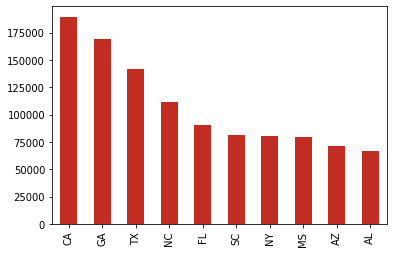

In [10]:
# Number of fire per state
clmns['STATE'].value_counts().head(n=10).plot(kind='bar', color='#c22d23')
mplot.show()

In [11]:
# Causes of fire of top 3 fire prone states
clmns_CA = clmns[clmns['STATE']=='CA']
clmns_GA = clmns[clmns['STATE']=='GA']
clmns_TX = clmns[clmns['STATE']=='TX']

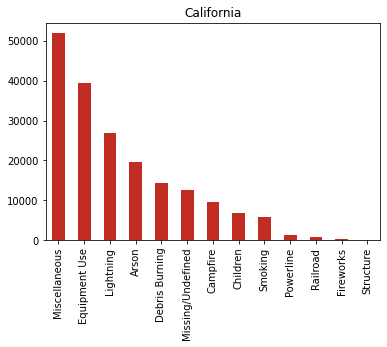

In [12]:
clmns_CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar', color='#c22d23',title='California')
mplot.show()

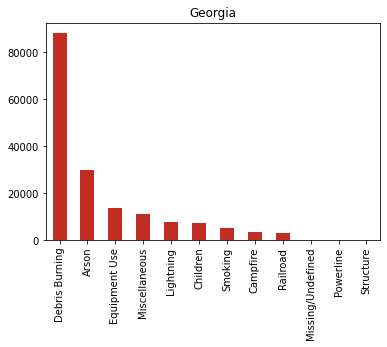

In [13]:
clmns_GA['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar', color='#c22d23',title='Georgia')
mplot.show()

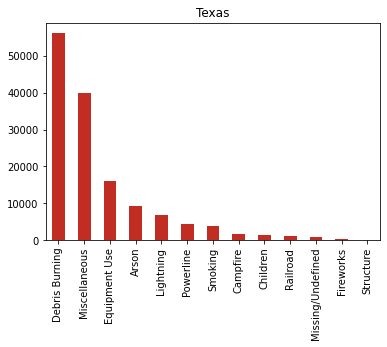

In [14]:
clmns_TX['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar', color='#c22d23',title='Texas')
mplot.show()

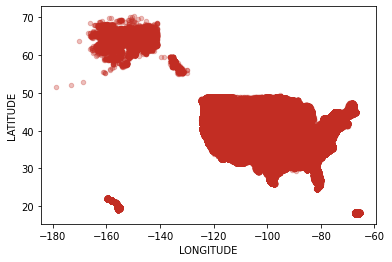

In [15]:
clmns.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='#c22d23',alpha=0.3)
mplot.show()

In [16]:
lblen = preprocessing.LabelEncoder()
clmns['STAT_CAUSE_DESCR'] = lblen.fit_transform(clmns['STAT_CAUSE_DESCR'])
clmns['STATE'] = lblen.fit_transform(clmns['STATE'])
clmns['DAY_OF_WEEK'] = lblen.fit_transform(clmns['DAY_OF_WEEK'])
print(clmns.head(15))

    FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
0        2005                 7  40.036944 -121.005833      4       2453403.5   
1        2004                 6  38.933056 -120.404444      4       2453137.5   
2        2004                 3  38.984167 -120.735556      4       2453156.5   
3        2004                 6  38.559167 -119.913333      4       2453184.5   
4        2004                 6  38.559167 -119.933056      4       2453184.5   
5        2004                 6  38.635278 -120.103611      4       2453186.5   
6        2004                 6  38.688333 -120.153333      4       2453187.5   
7        2005                 3  40.968056 -122.433889      4       2453437.5   
8        2005                 3  41.233611 -122.283333      4       2453444.5   
9        2004                 6  38.548333 -120.149167      4       2453187.5   
10       2004                 6  38.691667 -120.159722      4       2453188.5   
11       2004               

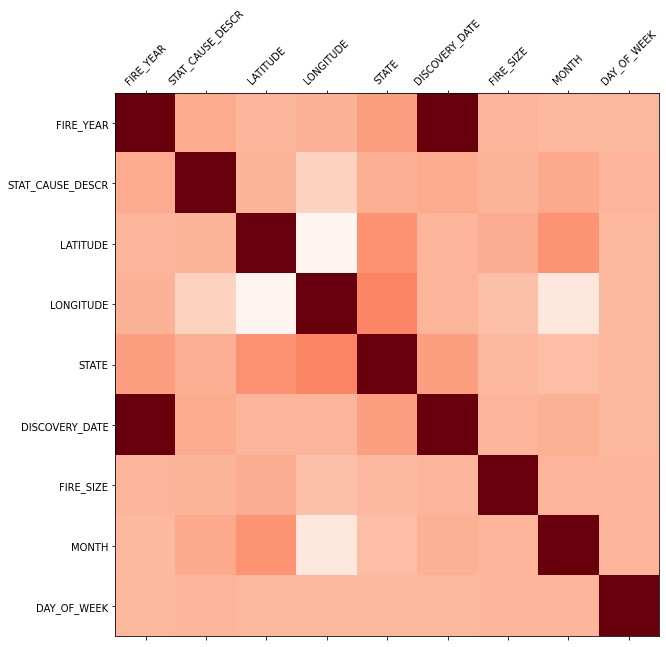

In [17]:
# Correlation matrix
def relPlot(clmns,size=10):
    corr = clmns.corr()
    fig, ax = mplot.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=mplot.cm.Reds)
    mplot.xticks(range(len(corr.columns)), corr.columns)
    mplot.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    mplot.show()

relPlot(clmns)

In [18]:
# Drop DATE column
clmns = clmns.drop('DATE',axis=1)
clmns = clmns.dropna()

In [19]:
# Training and Test Dataset
X = clmns.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = clmns['STAT_CAUSE_DESCR'].values

In [20]:
#Training:Testing = 25:75
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0) 

In [21]:
# Random Forest Classification
# prediction score about 0.58
rndFC = sken.RandomForestClassifier(n_estimators=50)
rndFC = rndFC.fit(X_train, y_train)
print(rndFC.score(X_test,y_test))

0.5815467213480899


In [22]:
# Reduces the number of classes to 4 for better prediction
def setLabel(itm):
    cause = 0
    causeGr1 = ['Lightning']
    causeGr2 = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    causeGr3 = ['Arson']
    causeGr4 = ['Missing/Undefined','Miscellaneous']
    if itm in causeGr1:
        cause = 1
    elif itm in causeGr2:
        cause = 2
    elif itm in causeGr3:
        cause = 3
    else:
        cause = 4
    return cause
     

clmns['LABEL'] = clmns1['STAT_CAUSE_DESCR'].apply(lambda x: setLabel(x))
clmns = clmns.drop('STAT_CAUSE_DESCR',axis=1)
print(clmns.head(15))

    FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
0        2005  40.036944 -121.005833      4       2453403.5       0.10      2   
1        2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2        2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3        2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4        2004  38.559167 -119.933056      4       2453184.5       0.10      6   
5        2004  38.635278 -120.103611      4       2453186.5       0.10      6   
6        2004  38.688333 -120.153333      4       2453187.5       0.10      7   
7        2005  40.968056 -122.433889      4       2453437.5       0.80      3   
8        2005  41.233611 -122.283333      4       2453444.5       1.00      3   
9        2004  38.548333 -120.149167      4       2453187.5       0.10      7   
10       2004  38.691667 -120.159722      4       2453188.5       0.10      7   
11       2004  38.527500 -12

In [23]:
# Labeling of STAT_CAUSE_DESCR

X = clmns.drop(['LABEL'], axis=1).values
y = clmns['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# Random forest classification
# prediction score about 0.70
rndFC = sken.RandomForestClassifier(n_estimators=50)
rndFC = rndFC.fit(X_train, y_train)
print(rndFC.score(X_test,y_test))

0.7029420335788751


In [24]:
# Confusion matrix
y_pred = rndFC.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 56796   8492    686   3490]
 [  8526 167083  14070  18302]
 [  1279  30233  32041   6327]
 [  5565  38820   4353  74054]]


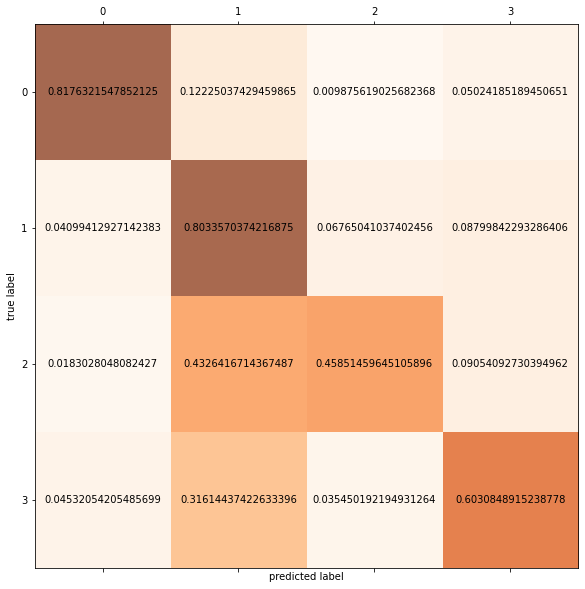

In [25]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = mplot.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=mplot.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
mplot.xlabel('predicted label')
mplot.ylabel('true label')
mplot.show()

In [26]:
# Prediction for CA only
print(clmns_CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  
0       0.10 2005-02-02      2   Wednesday  
1       0.25 2004-05-12      5   Wednesday  
2       0.10 2004-05-31      5      Monday  
3       0.10 2004-06-28      6      Monday  
4       0.10 2004-06-28      6      Monday  


In [27]:
def setLabelArson(cause):
    arson = 0
    if cause == 'Arson':
        arson = 1
    return arson

clmns_CA['ARSON'] = clmns_CA['STAT_CAUSE_DESCR'].apply(lambda x: setLabelArson(x)) 
print(clmns_CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  ARSON  
0       0.10 2005-02-02      2   Wednesday      0  
1       0.25 2004-05-12      5   Wednesday      0  
2       0.10 2004-05-31      5      Monday      0  
3       0.10 2004-06-28      6      Monday      0  
4       0.10 2004-06-28      6      Monday      0  


C:\Users\mmb\AppData\Local\Temp/ipykernel_9656/3620593473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clmns_CA['ARSON'] = clmns_CA['STAT_CAUSE_DESCR'].apply(lambda x: setLabelArson(x))


In [28]:
clmns_CA = clmns_CA.drop('DATE',axis=1)
clmns_CA = clmns_CA.drop('STATE',axis=1)
clmns_CA = clmns_CA.drop('STAT_CAUSE_DESCR',axis=1)
clmns_CA = clmns_CA.drop('FIRE_SIZE',axis=1)
clmns_CA = clmns_CA.dropna()

clmns_CA['DAY_OF_WEEK'] = lblen.fit_transform(clmns_CA['DAY_OF_WEEK'])

print(clmns_CA.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  DISCOVERY_DATE  MONTH  DAY_OF_WEEK  ARSON
0       2005  40.036944 -121.005833       2453403.5      2            6      0
1       2004  38.933056 -120.404444       2453137.5      5            6      0
2       2004  38.984167 -120.735556       2453156.5      5            1      0
3       2004  38.559167 -119.913333       2453184.5      6            1      0
4       2004  38.559167 -119.933056       2453184.5      6            1      0


In [29]:
# Training, testing and Random Forest Classification
# Prediction score about 0.92
X = clmns_CA.drop(['ARSON'], axis=1).values
y = clmns_CA['ARSON'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
rndFC = sken.RandomForestClassifier(n_estimators=200)
rndFC = rndFC.fit(X_train, y_train)
print(rndFC.score(X_test,y_test))

0.921098168312653
